Завдання

https://cms.ucu.edu.ua/mod/vpl/view.php?id=306617

Розробити функцію sort_songs(song_titles, length_songs, key), що сортує пісні за вказаним параметром (key). Функція при виклику приймає наступні аргументи:

параметр song_titles - це список назв пісень (наприклад гурту Океан Ельзи);

параметр length_songs - це відповідний список тривалостей пісень;

параметр key - ключ за яким буде здійснюватися сортування.

Функція повертає один відсортований список кортежів першим елементом якого є назва пісні, а другим тривалість цієї пісні. Серед ключів обов'язково передбачити сотрування за тривалістю пісень (song_length), за довжиною назви (title_length) та за першою літерою останнього слова назви (last_word). Якщо списки мають різну довжину, або їх елементи не є відповідного типу, то функція повинна повернути None. Заборонено використовувати анонімні функції у якості ключів.

Код, який не повністю працює (майже не працює)

In [16]:
'''
Sorts Song
'''
from collections.abc import Callable

def song_length(x: tuple[str]) -> float:
    '''
    Sorts song length
    '''
    return float(x[1])

def title_length(x: tuple[str]) -> int:
    '''
    Sorts by title length
    '''
    return len(x[0])

def last_word(x: tuple[str]) -> str:
    '''
    Sorts by last word
    '''
    lst = x[0].split(' ')
    return lst[-1][0]

def sort_songs(
    song_titles: list[str],
    length_songs: list[str],
    key_: Callable[[tuple], int | str | float]) -> list[tuple] | None:
    '''
    Sorts songs by the specified key parameter
    >>> sort_songs(['Янанебібув', 'Той день', 'Мало мені', 'Сосни', 'Кавачай', 'Відпусти', \
'Африка', 'Поясни', 'Фіалки', 'Коли тебе нема', 'Етюд'], ['3.19', '3.58', '5.06', '4.31', '4.39', \
'3.52', '4.24', '3.39', '3.43', '3.17', '2.21'], song_length)
    [('Етюд', '2.21'), ('Коли тебе нема', '3.17'), ('Янанебібув', '3.19'), ('Поясни', '3.39'), \
('Фіалки', '3.43'), ('Відпусти', '3.52'), ('Той день', '3.58'), ('Африка', '4.24'), \
('Сосни', '4.31'), ('Кавачай', '4.39'), ('Мало мені', '5.06')]
    '''
    lst = []
    counter = 0

    if len(song_titles) == len(length_songs):
        for i in length_songs:
            lst.append((song_titles[counter], i))
            counter += 1
            lst.sort()
        lst.sort(key = key_)
        return lst


Перший промпт дуже простий: умова, імплементація і прохання розробити модуль з тестами

In [17]:
import unittest

# from sort_songs import sort_songs, song_length, title_length, last_word


class TestSortSongs(unittest.TestCase):

    def test_empty_lists(self):
        """Tests sorting with empty lists."""
        self.assertEqual(sort_songs([], [], song_length), None)

    def test_unequal_list_lengths(self):
        """Tests sorting with lists of different lengths."""
        self.assertEqual(sort_songs(['Song 1'], ['3:00'], song_length), None)
        self.assertEqual(sort_songs(['Song 1', 'Song 2'], ['3:00'], song_length), None)

    def test_invalid_song_titles(self):
        """Tests sorting with invalid song titles (non-strings)."""
        self.assertEqual(sort_songs([1, 'Song 2'], ['3:00', '4:00'], song_length), None)
        self.assertEqual(sort_songs(['Song 1', None], ['3:00', '4:00'], song_length), None)

    def test_invalid_song_lengths(self):
        """Tests sorting with invalid song lengths (non-strings)."""
        self.assertEqual(sort_songs(['Song 1', 'Song 2'], [3, '4:00'], song_length), None)
        self.assertEqual(sort_songs(['Song 1', 'Song 2'], ['3:00', None], song_length), None)

    def test_sort_by_song_length(self):
        """Tests sorting by song length."""
        songs = [
            ('Song 3', '4:20'),
            ('Song 1', '3:10'),
            ('Song 2', '3:45'),
        ]
        expected = [
            ('Song 1', '3:10'),
            ('Song 2', '3:45'),
            ('Song 3', '4:20'),
        ]
        self.assertEqual(sort_songs([s[0] for s in songs], [s[1] for s in songs], song_length), expected)

    def test_sort_by_title_length(self):
        """Tests sorting by title length."""
        songs = [
            ('Short Song', '3:00'),
            ('Longer Song Title', '4:15'),
            ('Medium Length', '3:30'),
        ]
        expected = [
            ('Short Song', '3:00'),
            ('Medium Length', '3:30'),
            ('Longer Song Title', '4:15'),
        ]
        self.assertEqual(sort_songs([s[0] for s in songs], [s[1] for s in songs], title_length), expected)

    def test_sort_by_last_word(self):
        """Tests sorting by the first letter of the last word in the title."""
        songs = [
            ('Song with Bee', '2:50'),
            ('Another Song', '4:00'),
            ('Song About Cat', '3:15'),
        ]
        expected = [
            ('Another Song', '4:00'),
            ('Song About Cat', '3:15'),
            ('Song with Bee', '2:50'),
        ]
        self.assertEqual(sort_songs([s[0] for s in songs], [s[1] for s in songs], last_word), expected)

    def test_invalid_key(self):
        """Tests sorting with an invalid key function."""
        self.assertEqual(sort_songs(['Song 1', 'Song 2'], ['3:00', '4:00'], lambda x: x), None)


if __name__ == '__main__':
    unittest.main(argv=[''], verbosity=2, exit=False)


test_empty_lists (__main__.TestSortSongs.test_empty_lists)
Tests sorting with empty lists. ... FAIL
test_invalid_key (__main__.TestSortSongs.test_invalid_key)
Tests sorting with an invalid key function. ... FAIL
test_invalid_song_lengths (__main__.TestSortSongs.test_invalid_song_lengths)
Tests sorting with invalid song lengths (non-strings). ... ERROR
test_invalid_song_titles (__main__.TestSortSongs.test_invalid_song_titles)
Tests sorting with invalid song titles (non-strings). ... ERROR
test_sort_by_last_word (__main__.TestSortSongs.test_sort_by_last_word)
Tests sorting by the first letter of the last word in the title. ... FAIL
test_sort_by_song_length (__main__.TestSortSongs.test_sort_by_song_length)
Tests sorting by song length. ... ERROR
test_sort_by_title_length (__main__.TestSortSongs.test_sort_by_title_length)
Tests sorting by title length. ... ok
test_unequal_list_lengths (__main__.TestSortSongs.test_unequal_list_lengths)
Tests sorting with lists of different lengths. ... ERRO

Gemini неправильно зрозумів умову і позначив тривалість пісень у своїх тестах із символом ":". Це варто переробити.

In [18]:
import unittest

# from sort_songs import sort_songs, song_length, title_length, last_word


class TestSortSongs(unittest.TestCase):

    def test_empty_lists(self):
        """Tests sorting with empty lists."""
        self.assertEqual(sort_songs([], [], song_length), None)

    def test_unequal_list_lengths(self):
        """Tests sorting with lists of different lengths."""
        # self.assertEqual(sort_songs(['Song 1'], ['3.45'], song_length), None)
        self.assertEqual(sort_songs(['Song 1', 'Song 2'], ['3.45'], song_length), None)

    def test_invalid_song_titles(self):
        """Tests sorting with invalid song titles (non-strings)."""
        self.assertEqual(sort_songs([1, 'Song 2'], ['3.45', '4.00'], song_length), None)
        self.assertEqual(sort_songs(['Song 1', None], ['3.45', '4.00'], song_length), None)

    def test_invalid_song_lengths(self):
        """Tests sorting with invalid song lengths (non-strings or invalid format)."""
        self.assertEqual(sort_songs(['Song 1', 'Song 2'], [3, '4.00'], song_length), None)
        self.assertEqual(sort_songs(['Song 1', 'Song 2'], ['invalid', '4.00'], song_length), None)
        self.assertEqual(sort_songs(['Song 1', 'Song 2'], ['3:45', None], song_length), None)

    def test_sort_by_song_length(self):
        """Tests sorting by song length (with correct format)."""
        songs = [
            ('Song 3', '4.20'),
            ('Song 1', '3.10'),
            ('Song 2', '3.45'),
        ]
        expected = [
            ('Song 1', '3.10'),
            ('Song 2', '3.45'),
            ('Song 3', '4.20'),
        ]
        self.assertEqual(sort_songs([s[0] for s in songs], [s[1] for s in songs], song_length), expected)

    def test_sort_by_title_length(self):
        """Tests sorting by title length."""
        songs = [
            ('Short Song', '3.00'),
            ('Longer Song Title', '4.15'),
            ('Medium Length', '3.30'),
        ]
        expected = [
            ('Short Song', '3.00'),
            ('Medium Length', '3.30'),
            ('Longer Song Title', '4.15'),
        ]
        self.assertEqual(sort_songs([s[0] for s in songs], [s[1] for s in songs], title_length), expected)

    def test_sort_by_last_word(self):
        """Tests sorting by the first letter of the last word in the title."""
        songs = [
            ('Song with Bee', '2.50'),
            ('Another Song', '4.00'),
            ('Song About Cat', '3.15'),
        ]
        expected = [
            ('Another Song', '4.00'),
            ('Song About Cat', '3.15'),
            ('Song with Bee', '2.50'),
        ]
        self.assertEqual(sort_songs([s[0] for s in songs], [s[1] for s in songs], last_word), expected)

    def test_invalid_key(self):
        """Tests sorting with an invalid key function."""
        self.assertEqual(sort_songs(['Song 1', 'Song 2'], ['3.00', '4.00'], lambda x: x), None)


if __name__ == '__main__':
    unittest.main(argv=[''], verbosity=2, exit=False)

test_empty_lists (__main__.TestSortSongs.test_empty_lists)
Tests sorting with empty lists. ... FAIL
test_invalid_key (__main__.TestSortSongs.test_invalid_key)
Tests sorting with an invalid key function. ... FAIL
test_invalid_song_lengths (__main__.TestSortSongs.test_invalid_song_lengths)
Tests sorting with invalid song lengths (non-strings or invalid format). ... FAIL
test_invalid_song_titles (__main__.TestSortSongs.test_invalid_song_titles)
Tests sorting with invalid song titles (non-strings). ... ERROR
test_sort_by_last_word (__main__.TestSortSongs.test_sort_by_last_word)
Tests sorting by the first letter of the last word in the title. ... FAIL
test_sort_by_song_length (__main__.TestSortSongs.test_sort_by_song_length)
Tests sorting by song length (with correct format). ... ok
test_sort_by_title_length (__main__.TestSortSongs.test_sort_by_title_length)
Tests sorting by title length. ... ok
test_unequal_list_lengths (__main__.TestSortSongs.test_unequal_list_lengths)
Tests sorting with 

In [25]:
'''
Sorts Song
'''
import re
from collections.abc import Callable

def song_length(x: tuple[str]) -> float:
    '''
    Sorts song length
    '''
    return float(x[1])

def title_length(x: tuple[str]) -> int:
    '''
    Sorts by title length
    '''
    return len(x[0])

def last_word(x: tuple[str]) -> str:
    '''
    Sorts by last word
    '''
    lst = x[0].split(' ')
    return lst[-1][0]

def sort_songs(
    song_titles: list[str],
    length_songs: list[str],
    key_: Callable[[tuple], int | str | float]) -> list[tuple] | None:
    '''
    Sorts songs by the specified key parameter
    >>> sort_songs(['Янанебібув', 'Той день', 'Мало мені', 'Сосни', 'Кавачай', 'Відпусти', \
'Африка', 'Поясни', 'Фіалки', 'Коли тебе нема', 'Етюд'], ['3.19', '3.58', '5.06', '4.31', '4.39', \
'3.52', '4.24', '3.39', '3.43', '3.17', '2.21'], song_length)
    [('Етюд', '2.21'), ('Коли тебе нема', '3.17'), ('Янанебібув', '3.19'), ('Поясни', '3.39'), \
('Фіалки', '3.43'), ('Відпусти', '3.52'), ('Той день', '3.58'), ('Африка', '4.24'), \
('Сосни', '4.31'), ('Кавачай', '4.39'), ('Мало мені', '5.06')]
    '''
    lst = []
    if not song_titles or not length_songs or key_ not in \
        [last_word, title_length, song_length]:
        return None
    if len(song_titles) == len(length_songs):
        for i, length in enumerate(length_songs):
            if not isinstance(song_titles[i], str) or not re.match(r'^\d{1,2}\.\d{2}$', str(length)):
                return None
            lst.append((song_titles[i], length))
            lst.sort()
        lst.sort(key = key_)
        return lst
    return None


In [28]:
import unittest

# from sort_songs import sort_songs, song_length, title_length, last_word


class TestSortSongs(unittest.TestCase):

    def test_empty_lists(self):
        """Tests sorting with empty lists."""
        self.assertEqual(sort_songs([], [], song_length), None)

    def test_unequal_list_lengths(self):
        """Tests sorting with lists of different lengths."""
        self.assertEqual(sort_songs(['Song 1'], ['3.45'], song_length), [('Song 1', '3.45')])
        self.assertEqual(sort_songs(['Song 1', 'Song 2'], ['3.45'], song_length), None)

    def test_invalid_song_titles(self):
        """Tests sorting with invalid song titles (non-strings)."""
        self.assertEqual(sort_songs([1, 'Song 2'], ['3.45', '4.00'], song_length), None)
        self.assertEqual(sort_songs(['Song 1', None], ['3.45', '4.00'], song_length), None)

    def test_invalid_song_lengths(self):
        """Tests sorting with invalid song lengths (non-strings or invalid format)."""
        self.assertEqual(sort_songs(['Song 1', 'Song 2'], [3, '4.00'], song_length), None)
        self.assertEqual(sort_songs(['Song 1', 'Song 2'], ['invalid', '4.00'], song_length), None)
        self.assertEqual(sort_songs(['Song 1', 'Song 2'], ['3:45', None], song_length), None)

    def test_sort_by_song_length(self):
        """Tests sorting by song length (with correct format)."""
        songs = [
            ('Song 3', '4.20'),
            ('Song 1', '3.10'),
            ('Song 2', '3.45'),
        ]
        expected = [
            ('Song 1', '3.10'),
            ('Song 2', '3.45'),
            ('Song 3', '4.20'),
        ]
        self.assertEqual(sort_songs([s[0] for s in songs], [s[1] for s in songs], song_length), expected)

    def test_sort_by_title_length(self):
        """Tests sorting by title length."""
        songs = [
            ('Short Song', '3.00'),
            ('Longer Song Title', '4.15'),
            ('Medium Length', '3.30'),
        ]
        expected = [
            ('Short Song', '3.00'),
            ('Medium Length', '3.30'),
            ('Longer Song Title', '4.15'),
        ]
        self.assertEqual(sort_songs([s[0] for s in songs], [s[1] for s in songs], title_length), expected)

    def test_sort_by_last_word(self):
        """Tests sorting by the first letter of the last word in the title."""
        songs = [
            ('Song with Bee', '2.50'),
            ('Another Song', '4.00'),
            ('Song About Cat', '3.15'),
        ]
        expected = [
            ('Song with Bee', '2.50'),
            ('Song About Cat', '3.15'),
            ('Another Song', '4.00')
        ]
        self.assertEqual(sort_songs([s[0] for s in songs], [s[1] for s in songs], last_word), expected)

    def test_invalid_key(self):
        """Tests sorting with an invalid key function."""
        self.assertEqual(sort_songs(['Song 1', 'Song 2'], ['3.00', '4.00'], lambda x: x), None)


if __name__ == '__main__':
    unittest.main(argv=[''], verbosity=2, exit=False)

test_empty_lists (__main__.TestSortSongs.test_empty_lists)
Tests sorting with empty lists. ... ok
test_invalid_key (__main__.TestSortSongs.test_invalid_key)
Tests sorting with an invalid key function. ... ok
test_invalid_song_lengths (__main__.TestSortSongs.test_invalid_song_lengths)
Tests sorting with invalid song lengths (non-strings or invalid format). ... ok
test_invalid_song_titles (__main__.TestSortSongs.test_invalid_song_titles)
Tests sorting with invalid song titles (non-strings). ... ok
test_sort_by_last_word (__main__.TestSortSongs.test_sort_by_last_word)
Tests sorting by the first letter of the last word in the title. ... ok
test_sort_by_song_length (__main__.TestSortSongs.test_sort_by_song_length)
Tests sorting by song length (with correct format). ... ok
test_sort_by_title_length (__main__.TestSortSongs.test_sort_by_title_length)
Tests sorting by title length. ... ok
test_unequal_list_lengths (__main__.TestSortSongs.test_unequal_list_lengths)
Tests sorting with lists of di

Один тест на списки довжиною 1 мав неправильний очікуваний результат, а також тест на сортування за останнім словом назви написаний неправильно, тому я це переробила.

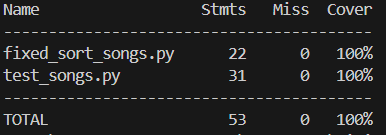